In [3]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

In [4]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [5]:
io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]

# get filenames
stats_path = io.grid_search_statistics_path
fn = "grid_search_statistics_B2_iforestres.csv"
stats_df = io.read_csv(fn, io.grid_search_statistics_path)


Reading grid_search_statistics_B2_iforestres.csv file


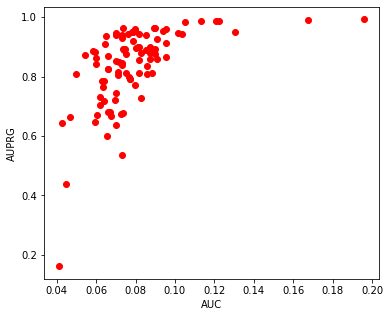

In [6]:
stats_df = stats_df.sort_values(by="auc", ascending=False)

plt.plot(stats_df['auc'], stats_df['auprg'], 'ro')
plt.xlabel("AUC")
plt.ylabel("AUPRG")
plt.show()